Voy a realizar una simulación donde en una población de agentes estos interactuen entre si. En función de las estrategias que tenga cada uno recibirá unos pagos. Se hará en varias rondas. En cada ronda un agente al menos interactuará una vez con otro agente escogido al azar.

Despues de unas cuantas rondas, un periodo T, las que tengan peor puntuación serán eliminadas. El umbral de puntuación se determina con el parámetro U.

Los agentes eliminados serán sustituidos por otros asignandoles a los nuevos una estrategia de forma aleatoria siguiendo la distribución de las que han quedado vivas.

Solo hay dos estrategias, colaborar (C) o no colaborar/competir (NC). Si los dos agentes que interactúan compiten uno se llevará 3 puntos y otro -3, el quien se elige al azar con probabilidad 50%. Si los dos colaboran ambos se llevan 1 punto. Si uno no colabora y el otro si, el que colabora se lleva 1 punto y el otro -1.

Se trata de ver si la diversidad de estrategias converge y se estabiliza en un función de los parámetors. Más adelanta se podría ver si cambiando la matriz a una donde la competición fuese favorable se tiende a otra convergencia.

In [5]:
# -*- coding: utf-8 -*- 
import requests
import io
import operator
import  csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.plotly as py
import cufflinks as cf
from scipy import stats
import random
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
%matplotlib inline

Ahora definimos los parametros

In [125]:
T=1
U=0
num_agentes=1000
num_turnos=1000;
estrategias=["C","NC"]
matriz_pagos_C={"C-C":[1,1],"NC-NC":[3,-3],"C-NC":[1,-1],"NC-C":[-1,1]}
agentes={}
num_agentes_C=0
num_agentes_NC=0
for i in range(0,num_agentes):
    agente={"estrategia":"","puntos":0}
    if (random.random()<0.01):
            agente["estrategia"]="C";
            num_agentes_C=num_agentes_C+1/num_agentes
    else:
            agente["estrategia"]="NC";
            num_agentes_NC=num_agentes_NC+1/num_agentes
    
    agentes[i]=agente


Ahora realizamos los turnos y en cada turno  primero interacionan, luego se eliminan y luego se añaden los nuevos agentes.

In [127]:
data_C={"turno":[0],"C":[num_agentes_C*100],"NC":[num_agentes_NC*100],"puntos":0}
for t in range(1,num_turnos+1):
    #interaccionan
    for a in agentes.keys():
        agente_1=agentes[a]
        list_agentes=list(agentes.keys())
        list_agentes.remove(a);
        num_agente_2=random.choice(list_agentes);
        agente_2=agentes[num_agente_2]
        #asignamos puntos
        interaccion=agente_1["estrategia"]+"-"+agente_2["estrategia"];
        pagos=matriz_pagos_C[interaccion];
        if (interaccion=="NC-NC"):
            random.shuffle(pagos)
        agente_1["puntos"]=agente_1["puntos"]+pagos[0]
        agente_2["puntos"]=agente_2["puntos"]+pagos[1]
    #buscamos los que no seran eliminados
    num_agentes_supervi=0;
    for a in agentes.keys():
        if (agentes[a]["puntos"]>U):
            num_agentes_supervi=num_agentes_supervi+1;
    #vemos el porcentaje de cada estrategia superviviente
    estrategias_percent={"C":0,"NC":0}
    for a in agentes.keys():
        if (agentes[a]["puntos"]>U):
            estrategias_percent[agentes[a]["estrategia"]]=estrategias_percent[agentes[a]["estrategia"]]+1/num_agentes_supervi
    #eliminamos las que estan por debajo o igual al umbral y añadimos nuevas en su lugar
    eliminados=0;
    eliminados_C=0
    eliminados_NC=0
    for a in agentes.keys():
        if (agentes[a]["puntos"]<=U):
            eliminados=eliminados+1/num_agentes;
            if (agentes[a]["estrategia"]=="C"):
                eliminados_C=eliminados_C+1/num_agentes
            elif (agentes[a]["estrategia"]=="NC"):
                eliminados_NC=eliminados_NC+1/num_agentes
            #estrategias_percent["C"]
            if (random.random()<0.01):
                agentes[a]["estrategia"]="C";
            else:
                agentes[a]["estrategia"]="NC";
        agentes[a]["puntos"]=0;
    data_C["turno"].append(t)
    data_C["C"].append(estrategias_percent["C"]*100)
    data_C["NC"].append(estrategias_percent["NC"]*100)
df = pd.DataFrame(data)
df=df.set_index('turno')
df.head()

,C,NC
turno,,
0,0.900000,99.100000
1,2.222222,97.777778
2,3.580563,96.419437
3,4.738155,95.261845
4,5.555556,94.444444


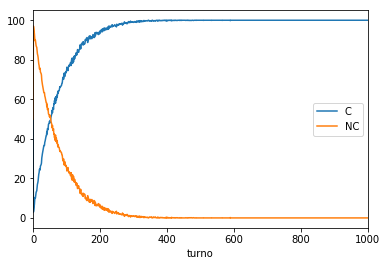

In [126]:
df.plot()
pass